## Workforce callout analysis and Employee performance Optimization

This analysis seeks to uncover patterns and trends in workforce callouts, pinpoint employees with frequent callouts, and offer insights for potential improvements or interventions. By analyzing the distribution of callouts across time, job titles, shifts, and individual employees, we can better understand the factors driving callout behavior and take measures to enhance workforce management and support employee well-being.

### About the dataset:

1. EmplID - Employee Name: Unique identifier and name of the employee.
2. Employee - EmplID - Job Title: Employee ID, job title, and possibly additional employment details.
3. Terminal: Location or workstation where the employee works.
4. Workforce Callout Number: Unique identifier for each absenteeism incident.
5. Call out Reasons: Reasons provided by employees for their absence.
6. Related Employee: Information about any related individuals involved in the absenteeism incident.
7. Shift: Employee's assigned work schedule or shift.
8. Date Created: Date and time when the absenteeism incident was recorded.

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

### Loading the dataset and getting to know about it.

In [2]:
df_raw = pd.read_csv(r"C:\Users\aniru\OneDrive\Documents\SRC\SRC 5\doctored_data.csv")
df_raw.head()

,EmplID - Employee Name,Employee - EmplID - Job Title,Terminal,Workforce Callout Number,Call out Reasons,Related Employee,Shift,Date Created
0,aabid,Bus Attendant,New York Ave,+(958) 694-3005,Unscheduled Sick Leave,31036,AM and PM,03-17-2024 10:46 PM
1,aabida,Motor Vehicle Operator,New York Ave,+(123) 958-8307,Unscheduled Sick Leave,41820,AM and PM,03-17-2024 08:28 PM
2,aachal,BUS ATTENDANT,New York Ave,+(289) 888-1482,Paid Family Leave,68058,AM and PM,03-17-2024 04:51 PM
3,aadesh,BUS ATTENDANT,New York Ave,+(953) 638-6905,Unscheduled Sick Leave,41452,PM,03-15-2024 02:35 PM
4,aadil,MOTOR VEHICLE OPERATOR,New York Ave,+(676) 207-3884,Unscheduled Sick Leave,127345,PM,03-15-2024 12:00 PM


In [3]:
df_raw.shape

(6288, 8)

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6288 entries, 0 to 6287
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   EmplID - Employee Name         6288 non-null   object
 1   Employee - EmplID - Job Title  6288 non-null   object
 2   Terminal                       6288 non-null   object
 3   Workforce Callout Number       6288 non-null   object
 4   Call out Reasons               6288 non-null   object
 5   Related Employee               6288 non-null   int64 
 6   Shift                          6288 non-null   object
 7   Date Created                   6288 non-null   object
dtypes: int64(1), object(7)
memory usage: 393.1+ KB


In [5]:
df_raw.isnull().sum()

EmplID - Employee Name           0
Employee - EmplID - Job Title    0
Terminal                         0
Workforce Callout Number         0
Call out Reasons                 0
Related Employee                 0
Shift                            0
Date Created                     0
dtype: int64

In [6]:
df_raw['EmplID - Employee Name'].duplicated().sum()

6169

In [7]:
#Calculating the percentage of missing values for each column
missing_percentage =  (df_raw.isnull().sum()/len(df_raw))*100
missing_percentage

EmplID - Employee Name           0.0
Employee - EmplID - Job Title    0.0
Terminal                         0.0
Workforce Callout Number         0.0
Call out Reasons                 0.0
Related Employee                 0.0
Shift                            0.0
Date Created                     0.0
dtype: float64

In [8]:
df_raw['Call out Reasons'].unique()

array(['Unscheduled Sick Leave', 'Paid Family Leave', 'Late to Work',
       'FMLA', 'Annual Leave - Unscheduled',
       'Unscheduled sick leave for 3 or more days'], dtype=object)

### Data Pre-processing

#### Primary pre-processing tasks necesary for this dataset are:

* Convert 'Date Created' Column to datetime format
* Consider only relevant callout reasons for analysis(drop irrelevant ones)
* handle duplicate values
* Handling missing values in the 'Workforce Callout Number' column

In [9]:
df_raw.drop_duplicates(inplace = True)

In [13]:
# converting 'Date Created' column to date-time format

df_raw['Date Created'] = pd.to_datetime(df_raw['Date Created'], format = "%d/%m/%Y")
# extracting the month and year features from Date Created column

df_raw['Year'] = df_raw['Date Created'].dt.year
df_raw['Month'] = df_raw['Date Created'].dt.month

In [14]:
# removing irrelevant callout reasons
relevant_callout_reasons = [
    'Unscheduled Sick Leave',
    'Annual Leave - Unscheduled',
    'Unscheduled sick leave for 3 or more days'
]

df = df_raw[df_raw['Call out Reasons'].isin(relevant_callout_reasons)]
df['Call out Reasons'].unique()

array(['Unscheduled Sick Leave', 'Annual Leave - Unscheduled',
       'Unscheduled sick leave for 3 or more days'], dtype=object)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5195 entries, 0 to 6287
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   EmplID - Employee Name         5195 non-null   object        
 1   Employee - EmplID - Job Title  5195 non-null   object        
 2   Terminal                       5195 non-null   object        
 3   Workforce Callout Number       5195 non-null   object        
 4   Call out Reasons               5195 non-null   object        
 5   Related Employee               5195 non-null   int64         
 6   Shift                          5195 non-null   object        
 7   Date Created                   5195 non-null   datetime64[ns]
 8   Year                           5195 non-null   int32         
 9   Month                          5195 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(6)
memory usage: 405.9+ KB


In [16]:
'''
handling the missing values in 'Workforce Callout Number' column
although there are only 5 missing values and removing it won't affect our analysis significantly
but since Workforce Callout Number is irrelevant to our outcomes of analysis, we can add dummy values to for those
5 missing rows which will not affect our accuracy
'''

# creating a function which will replace missing values in a dataframe with random categorical/numerical values

import pandas as pd
import numpy as np

def replace_missing_values_with_random_or_mode(df, col, strategy='random', random_state=None):
    """
    Replace missing values in a Pandas DataFrame with either random values or the mode of the column.

    Parameters:
    - df (pd.DataFrame): The input DataFrame
    - strategy (str, optional): The strategy to use for replacing missing values. Can be either 'random' or 'mode'. Default is 'random'
    - random_state (int, optional): The seed for the random number generator. Only used if strategy is 'random'. Default is None

    Returns:
    - pd.DataFrame: The modified DataFrame with missing values replaced
    """
    if strategy not in ['random', 'mode']:
        raise ValueError("Invalid strategy. Must be either 'random' or 'mode'")

    np.random.seed(random_state)
    if df[col].dtype == 'object':
        if strategy == 'random':
            # For categorical columns, replace missing values with a random value from the existing categories
            df.loc[:,col] = df.loc[:,col].fillna(pd.Series(np.random.choice(df.loc[:,col].dropna().unique(), size=len(df.loc[:,col].isnull()))))
        else:
            # For categorical columns, replace missing values with the mode
            mode_val = df.loc[:,col].mode().iloc[0]
            df.loc[:,col] = df.loc[:,col].fillna(mode_val)
    elif df.loc[:,col].dtype == 'int64' or df.loc[:,col].dtype == 'float64':
        if strategy == 'random':
            # For numerical columns, replace missing values with a random value within the range of the existing values
            min_val = df.loc[:,col].min()
            max_val = df.loc[:,col].max()
            df.loc[:,col] = df.loc[:,col].fillna(pd.Series(np.random.uniform(min_val, max_val, size=len(df[col].isnull()))))
        else:
            # For numerical columns, replace missing values with the mean
            mean_val = df.loc[:,col].mean()
            df.loc[:,col] = df.loc[:,col].fillna(mean_val)
    else:
        raise ValueError(f"Unsupported data type for column {col}: {df[col].dtype}")
    return df

In [17]:
df = replace_missing_values_with_random_or_mode(df, 'Workforce Callout Number', 'mode', 42)

In [18]:
df.isnull().sum()

EmplID - Employee Name           0
Employee - EmplID - Job Title    0
Terminal                         0
Workforce Callout Number         0
Call out Reasons                 0
Related Employee                 0
Shift                            0
Date Created                     0
Year                             0
Month                            0
dtype: int64

In [19]:
df.duplicated().sum()

0

In [20]:
# Convert 'Employee - EmplID - Job Title' column to lowercase and remove leading/trailing whitespace
df.loc[:,'Employee - EmplID - Job Title'] = df.loc[:,'Employee - EmplID - Job Title'].str.lower().str.strip()

# Display unique values to identify inconsistencies
print(df.loc[:,'Employee - EmplID - Job Title'].unique())

['bus attendant' 'motor vehicle operator']


### Univariate Analysis

#### Job Titile Distribution

In [21]:
# getting the distribution of 'Employee - EmplID - Job Title' column using value_counts()
df['Employee - EmplID - Job Title'].value_counts()

Employee - EmplID - Job Title
bus attendant             3416
motor vehicle operator    1779
Name: count, dtype: int64

<Axes: xlabel='Employee - EmplID - Job Title', ylabel='Count'>

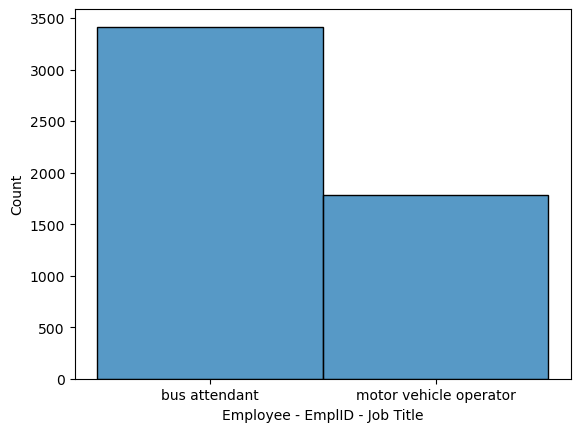

In [22]:
sns.histplot(df['Employee - EmplID - Job Title'], kde = False)

#### Insight :

There is a wide desparity between the number of 'bus attendant' and 'motor vehicle operator'.
Bus attendants take upto twice the size of the number of Motor Vehicle Operators.

#### Call-out reason Analysis

In [23]:
# getting the distribution of 'Call out reasons' column using value_counts()

df['Call out Reasons'].value_counts()

Call out Reasons
Unscheduled Sick Leave                       4123
Annual Leave - Unscheduled                    827
Unscheduled sick leave for 3 or more days     245
Name: count, dtype: int64

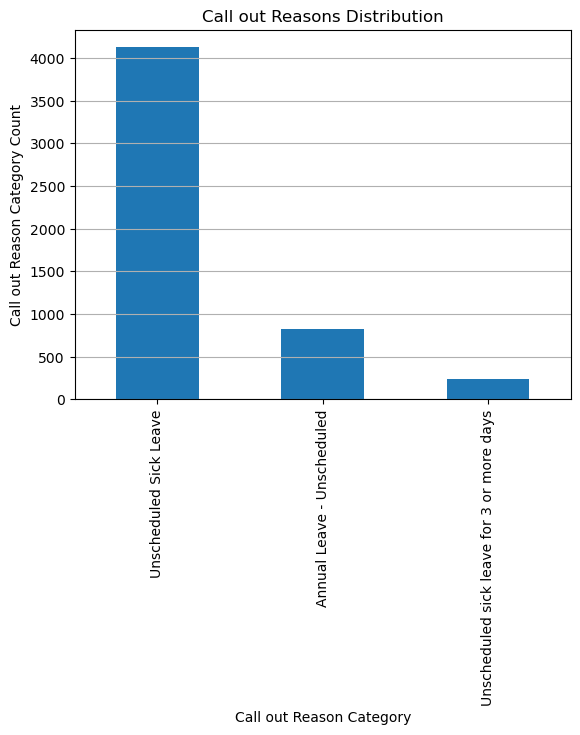

In [24]:
df['Call out Reasons'].value_counts().plot(kind="bar")

# Set the title and labels for the chart
plt.title("Call out Reasons Distribution")
plt.xlabel("Call out Reason Category")
plt.ylabel("Call out Reason Category Count")

# Add a grid to the chart for clarity
plt.grid(axis='y')

#### Insight:

Unscheduled Sick Leave has a significantly higher count compared to other reasons.

#### Shift Distribution

In [25]:
# getting teh distribution of different work shifts in the 'Shift' column using value_counts()
df['Shift'].value_counts()

Shift
AM and PM    3023
PM           1480
AM            692
Name: count, dtype: int64

Text(0, 0.5, 'Number of Employees')

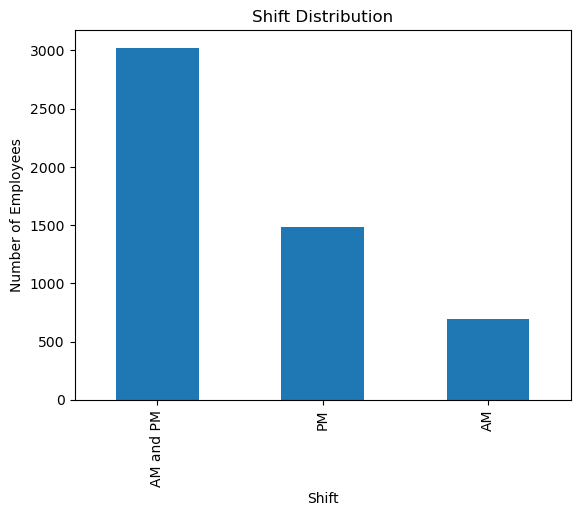

In [26]:
df['Shift'].value_counts().plot(kind="bar")

# Set the title and labels for the chart
plt.title("Shift Distribution")
plt.xlabel("Shift")
plt.ylabel("Number of Employees")

#### Insight

The progressive count amongst each category is almost twice, i.e, twice the number of AM workers in PM workers and twice the number of PM workers in AM and PM workers.

### Bi-Variate Analysis

### Call-out Frequency over Time

In [27]:
# counting the number of callouts according to different months and year
monthly_callouts = pd.DataFrame(df.groupby(['Year', 'Month'])['Workforce Callout Number'].count()).sort_values(by = ['Year', 'Month'])

# Display the monthly call-out counts
print(monthly_callouts)

            Workforce Callout Number
Year Month                          
2022 9                            30
     10                          162
     11                          185
     12                          203
2023 1                           248
     2                           220
     3                           237
     4                           217
     5                           284
     6                           339
     7                           324
     8                           307
     9                           363
     10                          347
     11                          329
     12                          371
2024 1                           475
     2                           370
     3                           184


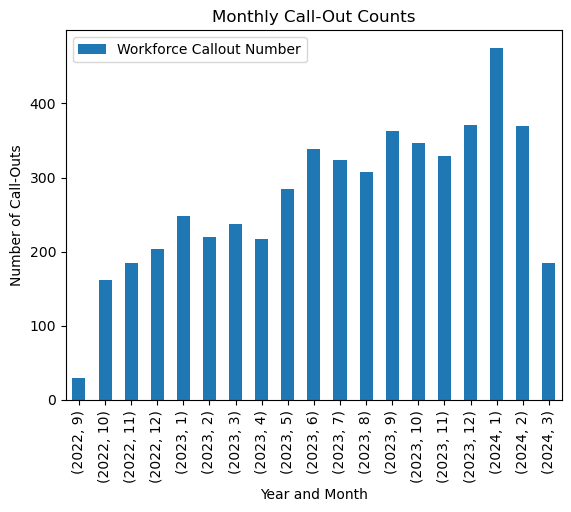

In [28]:
# plotting the monthly call-out counts
monthly_callouts.plot(kind='bar')

# Set the title and labels for the chart
plt.title("Monthly Call-Out Counts")
plt.xlabel("Year and Month")
plt.ylabel("Number of Call-Outs")



# displaying the chart
plt.show()


#### Inference:

* The visualization reveals a varying pattern of callouts from the period of Sept'22 to Jan'24

#### Trend:

* There is a growing trend of monthly callout frequency from Sept'22 to Jan'24.
* The spikes in the chart can be a result of seasonal behavour of employees observed during fall of each year.
* There is a significant rise in frequency from Sept'22 to Oct'22 and the reason for that can be increasing in workforce.
* The highest number of callouts is in the period of Jan'24 might be because of polarity in country's political policies or weather break-outs.

#### Causes and suggestions:
* Absenteeism due to seasonal factors can be handled by introducing flexible work arrangements specifically designed for bus attendants and motor vehicle operators to accommodate their schedules and reduce absenteeism during peak periods.
* As 'Unplanned sick leaves' is one of the most primary reasons behind callouts, implementing tailored wellness initiatives targeting the unique needs of bus attendants and motor vehicle operators to improve their health and well-being can help reduce the number.

### Related Employee Analysis

In [29]:
related_emp_callout_count = df.groupby('Related Employee')['Workforce Callout Number'].count().sort_values(ascending = False)
related_emp_callout_count.head(10)

Related Employee
41820     189
111881    176
101589    153
42232     125
42381     121
123310    118
108814    115
112095    114
103558    114
42219     103
Name: Workforce Callout Number, dtype: int64

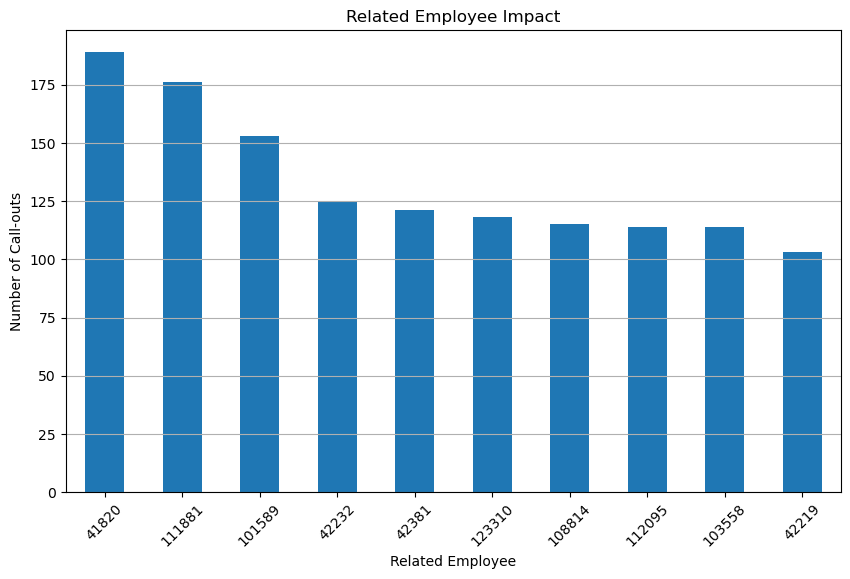

In [30]:
plt.figure(figsize=(10, 6))
related_emp_callout_count.head(10).plot(kind='bar')
plt.title('Related Employee Impact')
plt.xlabel('Related Employee')
plt.ylabel('Number of Call-outs')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#### Inference:
As the above bar chart represents the count of callouts for certain employees, it can be inferenced that the number of callouts made by the employees is in directly proportional when another related employee is making a call-out.
It can be a useful way to understand how absenses can impact the whole team's performance.

#### Causes and Suggestions:

* Collaborative Work Environment:
Employees can be cosely connected to other employees in their work, leading to subsequent involvement in eachother's absenteeism.

A detailed analysis can be carried out to understand the underlying reasons for the high involvement of related employees in absenteeism incidents.

* Team Dynamics:
Certain teams might be experiencing higher absenteeism rates potentially due to shared responsibilities or work conditions

Measures can be taken to improve team-work environments and nurture positive work relationships among employees.

* Heirarchial relationships:
Employees with supervisory roles or responsibilities may be more likely tobe involved with absenteeism causes of their sub-ordinates.

Providing training and support to supervisors and managers to effectively manage absenteeism and promote employee engagement and attendance can help reduce the above causes for absenteeism.

### Shift-wise Absenteeism

In [31]:
# Grouping by shifts and counting the number of callouts for each shift

shift_absenteeism = df.groupby('Shift')['Workforce Callout Number'].count().sort_values(ascending = False)
shift_absenteeism

Shift
AM and PM    3023
PM           1480
AM            692
Name: Workforce Callout Number, dtype: int64

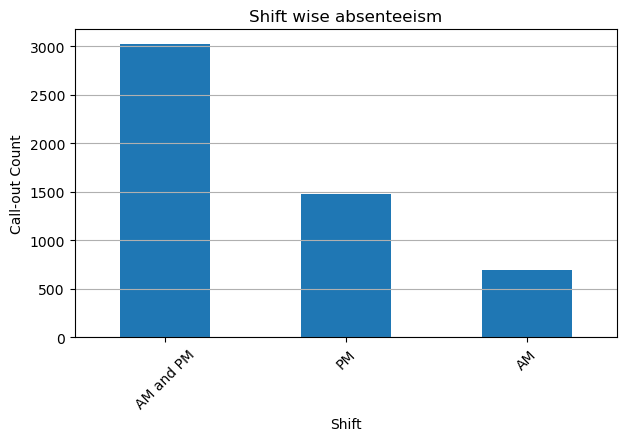

In [32]:
plt.figure(figsize = (7,4))
shift_absenteeism.plot(kind = 'bar')
plt.title('Shift wise absenteeism')
plt.xlabel('Shift')
plt.ylabel('Call-out Count')
plt.xticks(rotation = 45)
plt.grid(axis = 'y')
plt.show()

#### Inference:
The above chart shows the count of call-outs with respect to different shift preferences.
It can be noticed that the count of call-outs made doubles up with different types of shifts preferred.

#### Causes and Suggestions:

* The combined 'AM and PM' shift has the highest count of call-outs made which suggests that employees assigned to both morning and evening shift working times are more prone to absenteeism than the rest.
* The count of call-outs is almost halved for the employees working in PM shift which is still a significant number.
* The count of call-outs made for the employees working in the morning shift is the least of all shifts and thus they are less prone to absenteeism.

Suggestions: 

* Further Research: Conduct a detailed analysis to identify underlying factors contributing to the discrepancies in absenteeism rates across different shifts. Factors such as workload distribution, shift scheduling, and employee preferences should be explored to better understand the reasons behind the observed patterns.

* Targetted Interventions:Implement targeted interventions aimed at reducing absenteeism among employees assigned to the AM and PM shifts, as they exhibit the highest absenteeism rates. This may involve providing additional support, addressing workload issues, or offering incentives to improve attendance.

* Shift planning optimizations: Review and optimize shift planning processes to ensure a balanced distribution of workload and minimize potential stressors that could contribute to absenteeism. Flexibility in shift scheduling and accommodating employee preferences may also help in improving attendance rates.

### Top employees' Call-outs

In [33]:
# grouping by the employee_id to get the individual count of call-outs for each employee
emp_count = df.groupby('EmplID - Employee Name')['Workforce Callout Number'].count().reset_index()
emp_count = emp_count.sort_values(by = 'Workforce Callout Number', ascending = False)
emp_count.rename(columns = {'EmplID - Employee Name':'EmpID', 'Workforce Callout Number':'Count'}, inplace = True)
top_10_employees_absenteeism = emp_count.head(10)
emp_count.head(10)

,EmpID,Count
1,aabida,189
24,aamil,176
90,abhash,153
32,aanamika,125
31,aanad,121
18,aakas,118
37,aansi,115
34,aanchal,114
99,abhimanyu,114
35,aanik,103


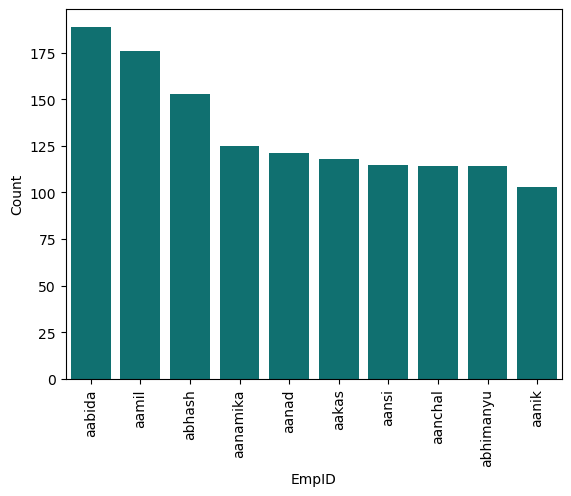

In [34]:
sns.barplot(x='EmpID', y='Count', data=top_10_employees_absenteeism, color = 'teal')
plt.xticks(rotation = 90)
# Display the plot
plt.show()

#### Inference:
The above chart highlights the employee IDs of top 10 employees with highest call-out count.
Employees like 'Poston, Britannia', 'Johnson, Rolisha A' & 'Thompson, Tiffany D' are the top 3 absentees and their count of call-outs are significantly higher than others in the list which suggests that they might be facing chronic reasons pf absenteeism.

#### Causes and suggestions:

* Employees like Britannia Poston and Rolisha A Johnson might be facing any kind of ongoing absenteeism issues, possibly due to health concerns, personal circumstances or job related factors.
* Employees mightbe facing any kind of job related stress due to worload pressure, job responsibilities or workplace environment.
* Analyzing call-out counts over different times can reveal trend patterns such as seasonal patterns or other. Understanding these patterns will help in addressing the issue and coming up with better solutions.

Suggestions:
* Supportive Interventions:
        Implement targeted interventions to address the specific needs of employees with high call-out counts. This could include providing counseling, flexible work arrangements, or wellness programs to support employee well-being.
* Communication and Engagement:
    Foster open communication channels and promote employee engagement to address underlying issues contributing to absenteeism. Regular feedback sessions and employee surveys can help identify areas for improvement.
* Performance Management:
    Review performance management practices to ensure fair and consistent treatment of employees. Providing recognition for attendance and addressing performance issues promptly can help mitigate absenteeism.
* Workplace Policies:
    Review and update workplace policies and procedures to ensure they support employee well-being and attendance. This could include policies related to sick leave, remote work, and flexible scheduling.

### Overall Insight and Recommendation:-
#### Insights:
1. Unscheduled sick leave is predominant, indicating a need for health-related support programs and absenteeism management strategies.

2. There's a substantial difference between Bus Attendants and Motor Vehicle Operators, warranting a review of workload distribution and job satisfaction among these roles.

3. AM and PM mixed shift preference signals potential scheduling issues or workload distribution imbalances, requiring optimization and flexibility in shift planning.

4. Employees like Britannia Poston, Rolisha A Johnson, and Tiffany D Thompson exhibit high absenteeism rates, suggesting the need for personalized support interventions and performance management strategies.

5. Identifying root causes behind high involvement in absenteeism incidents and fostering a supportive work environment can mitigate absenteeism rates among related employees.

6. Seasonal and monthly fluctuations in absenteeism call for tailored wellness programs, flexible policies, and performance monitoring to address varying workload and employee well-being concerns.

7. Further investigation into factors contributing to different shift absenteeism rates is necessary, with targeted interventions focused on optimizing shift planning and addressing potential stressors.

#### Recommendations:

1. Implement tailored wellness programs to support employee health and well-being, addressing prevalent absence reasons like unscheduled sick leave.

2. Review workload distribution and job satisfaction among Bus Attendants and Motor Vehicle Operators to ensure equitable treatment and promote engagement.

3. Optimize shift planning processes to address disparities in absenteeism rates across different shifts, ensuring flexibility and balance in scheduling.

4. Provide personalized support and performance management interventions for employees with high absenteeism rates, addressing underlying issues and promoting accountability.

5. Foster a supportive work environment and open communication channels to mitigate absenteeism's impact, emphasizing teamwork and collaboration.

6. Continuously monitor absenteeism trends and adjust strategies accordingly to maintain workforce productivity and well-being.